### Question 3
How to Solve Burger’s equation using Lax-Wendroff:
Begin the derivation with the function written as 
\begin{equation}
u ( x , t + \Delta t ) = u ( x , t ) - \Delta t \epsilon \frac { \partial } { \partial x } \left( \frac { u ^ { 2 } } { 2 } \right) + \frac { ( \Delta t ) ^ { 2 } } { 2 } \epsilon ^ { 2 } \frac { \partial } { \partial x } \left[ u \frac { \partial } { \partial x } \left( \frac { u ^ { 2 } } { 2 } \right) \right]
\end{equation}
Now, by substituting in 
\begin{equation}
\frac { \partial u ^ { 2 } ( x , t ) } { \partial x } = \frac { \left( u _ { i + 1 } ^ { j } \right) ^ { 2 } - \left( u _ { i - 1 } ^ { j } \right) ^ { 2 } } { 2 \Delta x }
\end{equation}
and 
\begin{equation}
\frac { \partial } { \partial x } \left[ u \frac { \partial u ^ { 2 } } { \partial x } \right] = \frac { 1 } { \Delta x } \left[ u ( x + \Delta x / 2 ) \frac { \partial u ^ { 2 } ( x + \Delta x / 2 , t ) } { \partial x } - u ( x - \Delta x / 2 ) \frac { \partial u ^ { 2 } ( x - \Delta x / 2 , t ) } { \partial x } \right]
\end{equation}
the solution is of the form
\begin{equation}
u ( x , t + \Delta t ) = u ( x , t ) - \Delta t \epsilon \frac { \left( u _ { i + 1 } ^ { j } \right) ^ { 2 } - \left( u _ { i - 1 } ^ { j } \right) ^ { 2 } } { 4 \Delta x } + \frac { ( \Delta t ) ^ { 2 } } { 2 } \epsilon ^ { 2 } \frac { 1 } {  2\Delta x } \left[ u ( x + \Delta x / 2 ) \frac { \partial u ^ { 2 } ( x + \Delta x / 2 , t ) } { \partial x } - u ( x - \Delta x / 2 ) \frac { \partial u ^ { 2 } ( x - \Delta x / 2 , t ) } { \partial x } \right]
\end{equation}
Now I can estimate the values 
\begin{equation}
u \left( x \pm \frac { \Delta x } { 2 } , t \right) = \frac{u _i^j + u_{i \pm 1} ^j }{2}
\end{equation}
and 
\begin{equation}
\frac { \partial u ^ { 2 } ( x \pm \Delta x / 2 , t ) } { \partial x } = \frac { \left( u _ { i \pm 1 } ^ { j } \right) ^ { 2 } - \left( u _ { i } ^ { j } \right) ^ { 2 } } { \pm \Delta x }
\end{equation}
to arrive at the final answer
\begin{equation}
u(x,t + \Delta t)=u(x,t)-\Delta t \epsilon \frac { \left( u _ { i + 1 } ^j \right) ^2 - \left( u_{i-1} ^ { j } \right) ^2} { 4 \Delta x } + \frac {(\Delta t)^2}{2} \epsilon ^2 \frac { 1 } {  4\Delta x } \left[\left({u _i^j + u_{i + 1} ^j} \right) \frac { \left( u_{i +1}^j \right) ^2 - \left( u_i ^ { j } \right) ^2} {  \Delta x } - \left({u _i^j + u_{i - 1} ^j } \right)\frac { \left( u_{i-1} ^j \right) ^2 - \left( u_i ^j \right) ^2 } {-\Delta x }\right]
\end{equation}
which by setting $\beta = \epsilon \Delta t / \Delta x$, I can write this as 
\begin{equation}
u_i^ {j+1} = u_i^j- \beta \frac { \left( u_{i+1} ^j \right) ^2 - \left( u_{i-1}^j \right)^2 }{4} + \frac{\beta^2}{8} \left[\left({u _i ^j + u_{i+1} ^j } \right)\left( \left( u_{i+1} ^j \right) ^2- \left( u _i ^j\right) ^2 \right)+ \left({u_i ^j + u_{i-1} ^j } \right) \left(\left( u_{i-1}^j \right)^2-\left(u_i^j\right) ^2\right) \right]
\end{equation}


In [7]:
import numpy as np
import matplotlib.pyplot as plt 

In [1]:
x_N = 2*np.pi  # size of length domain
t_N = 2        # size of time domain
x_delta = 0.02 # space step
t_delta = 0.005 #time step
# now generated arrays
x_space = np.arange(0,x_N,x_delta ) 
t_space = np.arange(0,t_N,t_delta )

epsilon = 1

In [5]:
u = np.zeros([len(x_space),len(t_space)])  # generate empty velocity array
beta = epsilon*t_delta/x_delta             # generalized step size
# initial conditions
for i in range(1,len(x_space)-1):       
    u[i,0] = np.sin(x_space[i])
    u[i,1] = u[i,0] + t_delta*np.cos(x_space[i])
# iterated solver
for j in range(1,len(t_space)-1):
    for i in range(1,len(x_space)-1):
            u[i,j+1] =u[i,j] - beta*(u[i+1,j]**2-u[i-1,j]**2)/4.0 + \
            beta**2/8.0*((u[i+1,j]+u[i,j])*(u[i+1,j]**2 - u[i,j]**2) \
                         + (u[i-1,j]+u[i,j])*(u[i-1,j]**2 - u[i,j]**2)) 

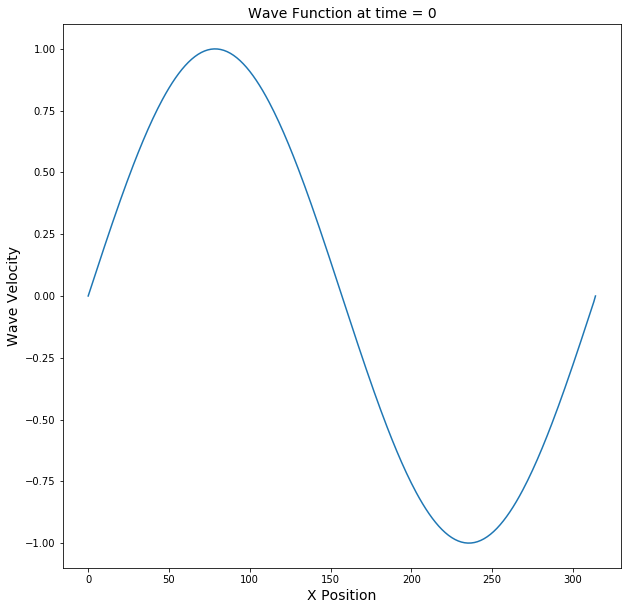

In [8]:
plt.figure(figsize = (10,10))
plt.plot(u[:,0])
plt.title('Wave Function at time = 0', fontsize = (14))
plt.xlabel('X Position', fontsize = (14))
plt.ylabel('Wave Velocity',fontsize = (14))
plt.show()

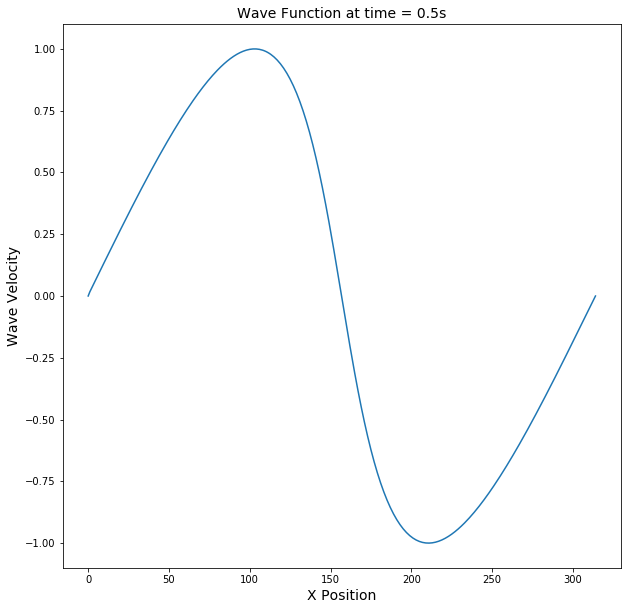

In [9]:
plt.figure(figsize = (10,10))
plt.plot(u[:,100])
plt.title('Wave Function at time = 0.5s', fontsize = (14))
plt.xlabel('X Position', fontsize = (14))
plt.ylabel('Wave Velocity',fontsize = (14))
plt.show()

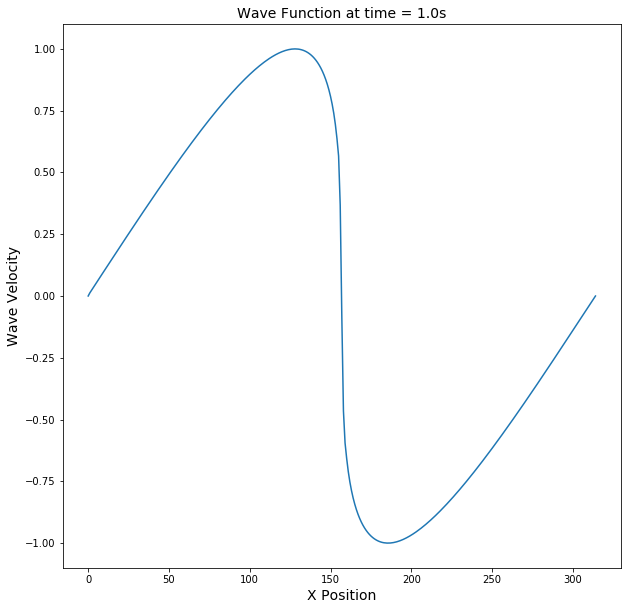

In [10]:
plt.figure(figsize = (10,10))
plt.plot(u[:,200])
plt.title('Wave Function at time = 1.0s', fontsize = (14))
plt.xlabel('X Position', fontsize = (14))
plt.ylabel('Wave Velocity',fontsize = (14))
plt.show()

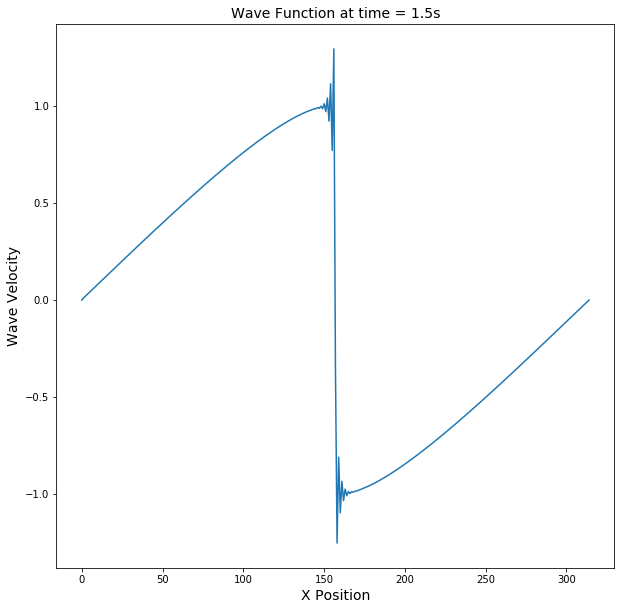

In [11]:
plt.figure(figsize = (10,10))
plt.plot(u[:,300])
plt.title('Wave Function at time = 1.5s', fontsize = (14))
plt.xlabel('X Position', fontsize = (14))
plt.ylabel('Wave Velocity',fontsize = (14))
plt.show()

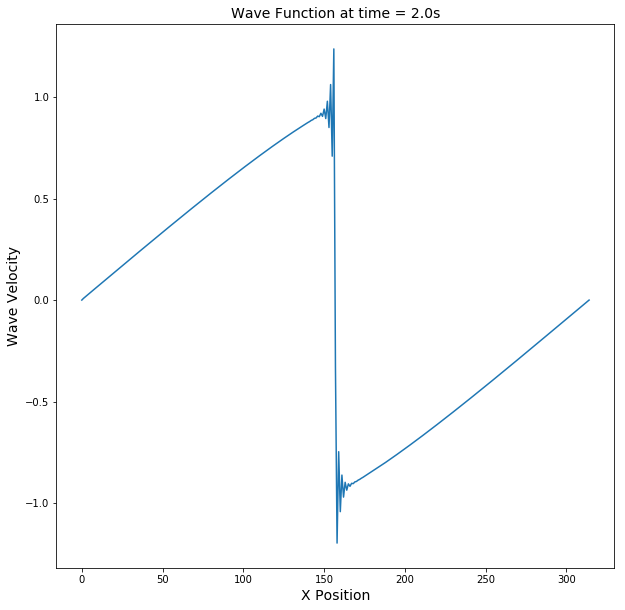

In [12]:
plt.figure(figsize = (10,10))
plt.plot(u[:,399])
plt.title('Wave Function at time = 2.0s', fontsize = (14))
plt.xlabel('X Position', fontsize = (14))
plt.ylabel('Wave Velocity',fontsize = (14))
plt.show()